In [ ]:
!pip install qutip

In [ ]:
!pip install krotov

In [ ]:
import sys
import os
import qutip
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
import krotov
from scipy.fftpack import fft
from scipy.interpolate import interp1d
from qutip.control import *

from scipy.stats import unitary_group
import math as mt

In [ ]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1.j], [1.j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

Isigma_z = np.array([[1, 0, 0, 0],
           [0, -1, 0, 0],
           [0, 0, 1, 0],
           [0, 0, 0, -1]])

sigma_zI =np.array( [[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, -1, 0],
           [0, 0, 0, -1]])

Isigma_x = np.array([[0, 1, 0, 0],
           [1, 0, 0, 0],
           [0, 0, 0, 1],
           [0, 0, 1, 0]])

sigma_xI = np.array([[0, 0, 1, 0],
           [0, 0, 0, 1],
           [1, 0, 0, 0],
           [0, 1, 0, 0]])
Isigma_y = np.array([[0, -1.j, 0, 0],
           [1.j, 0, 0, 0],
           [0, 0, 0, -1.j],
           [0, 0, 1.j, 0]])

sigma_yI = np.array([[0, 0, -1.j, 0],
           [0, 0, 0, -1.j],
           [1.j, 0, 0, 0],
           [0, 1.j, 0, 0]])

sigma_x_x = np.array([[0, 0, 0, 1],
           [0, 0, 1, 0],
           [0, 1, 0, 0],
           [1, 0, 0, 0]])

sigma_y_y = np.array([[0, 0, 0, -1],
           [0, 0, 1, 0],
           [0, 1, 0, 0],
           [-1, 0, 0, 0]])

sigma_z_z = np.array([[1, 0, 0, 0],
           [0, -1, 0, 0],
           [0, 0, -1, 0],
           [0, 0, 0, 1]])


In [ ]:
def guess_control1(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=300, t_rise=0.3, func="blackman"
    )
def guess_control2(t , args,ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=300, t_rise=0.3, func="blackman"
    )
def guess_control3(t , args,ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=300, t_rise=0.3, func="blackman"
    )
def guess_control4(t , args,ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=300, t_rise=0.3, func="blackman"
    )

In [ ]:
def hamiltonian(omega1=1 ,omega2=1, ampl0=0.2, J=0.01  ):
    H0 = qutip.Qobj((-0.5) *( omega1 * Isigma_z +  omega2 * sigma_zI )+J* (sigma_z_z))
    H1 = qutip.Qobj(Isigma_x)
    H2 = qutip.Qobj(sigma_xI)
    H3 = qutip.Qobj(Isigma_y)
    H4 = qutip.Qobj(sigma_yI)

    return [H0,[H1,guess_control1],[H2,guess_control2], [H3,guess_control3], [H4,guess_control4]]


H = hamiltonian()

In [ ]:
tlist = np.linspace(0, 300, 3000)

In [ ]:
def logical_basis(H):
    H0 = qutip.Qobj((-0.5) *(1 * Isigma_z +  1 * sigma_zI ))
    eigenvals, eigenvecs = scipy.linalg.eig(H0.full())
    ndx = np.argsort(eigenvals.real)
    E = eigenvals[ndx].real
    V = eigenvecs[:, ndx]
    psi00 = qutip.Qobj(V[:, 0])
    psi01 = qutip.Qobj(V[:, 1])
    psi10 = qutip.Qobj(V[:, 2])
    psi11 = qutip.Qobj(V[:, 3])
    w01 = E[1] - E[0]  # Transition energy between states
    print("Energy of qubit transition is %.3f" % w01)
    return psi00, psi01, psi10, psi11

psi00, psi01, psi10, psi11 = logical_basis(H)

Energy of qubit transition is 1.000


In [ ]:
proj00 = qutip.ket2dm(psi00)
proj01 = qutip.ket2dm(psi01)
proj10 = qutip.ket2dm(psi10)
proj11 = qutip.ket2dm(psi11)

In [ ]:

RandU_2Q = []
N = 100

for i in range(N):
    teta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2*np.pi)
    landa = np.random.uniform(0, 2*np.pi)
    gama = np.random.uniform(0, 2*np.pi)
    RandU_2Q.append(CRU(teta, phi, landa, gama))


In [ ]:
basis = [psi00, psi01, psi10, psi11]
basis

[Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]],
 Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]],
 Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]]]

In [ ]:

objectives=[0]*100
for i in range(100):
  objectives[i] = krotov.gate_objectives(
      basis_states=[psi00, psi01, psi10, psi11], gate=RandU_2Q[i], H=H
  )



def S(t):
    """Scales the Krotov methods update of the pulse value at the time t"""
    return krotov.shapes.flattop(
        t, t_start=0, t_stop=300, t_rise=0.3, t_fall=0.3, func='blackman'
   )

#pulse_options = {H[1][1]: dict(lambda_a=1, update_shape=S)}

pulse_options = {
    H[1][1]: dict(lambda_a=1, update_shape=S),
    H[2][1]: dict(lambda_a=1, update_shape=S),
    H[3][1]: dict(lambda_a=1, update_shape=S),
    H[4][1]: dict(lambda_a=1, update_shape=S)
}

In [ ]:
results=[]
for i in range(5):

  opt_result = krotov.optimize_pulses(
      objectives[i],
      pulse_options=pulse_options,
      tlist=tlist,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_sm,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('1e-3', name='J_T'),
          krotov.convergence.delta_below(1e-5),
          krotov.convergence.check_monotonic_error,
      ),
      store_all_pulses=True,
  )

  results.append(opt_result)


  #j_f=[]
  #j_f.append(opt_result.info_vals)
#print(j_f)


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     7.92e-01    0.00e+00   7.92e-01        n/a        n/a    55
1     3.89e-01    9.49e-02   4.84e-01  -4.03e-01  -3.08e-01   117
2     2.42e-01    6.90e-02   3.11e-01  -1.47e-01  -7.84e-02   116
3     1.61e-01    3.93e-02   2.00e-01  -8.12e-02  -4.19e-02   115
4     1.33e-01    1.38e-02   1.47e-01  -2.80e-02  -1.42e-02   116
5     1.09e-01    1.17e-02   1.21e-01  -2.37e-02  -1.20e-02   115
6     9.99e-02    4.55e-03   1.04e-01  -9.17e-03  -4.61e-03   114
7     8.95e-02    5.19e-03   9.47e-02  -1.04e-02  -5.25e-03   114
8     8.00e-02    4.74e-03   8.47e-02  -9.50e-03  -4.76e-03   115
9     6.75e-02    6.23e-03   7.37e-02  -1.25e-02  -6.27e-03   114
10    5.20e-02    7.70e-03   5.97e-02  -1.55e-02  -7.79e-03   115
11    4.07e-02    5.62e-03   4.63e-02  -1.13e-02  -5.71e-03   114
12    3.46e-02    3.00e-03   3.76e-02  -6.06e-03  -3.06e-03   115
13    3.11e-02    1.75e-03   3.28e-02  -3.53e-03  -1.78e-03   115
14    2.89

In [ ]:
results2=[]
for i in range(5, 9):

  opt_result = krotov.optimize_pulses(
      objectives[i],
      pulse_options=pulse_options,
      tlist=tlist,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_sm,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('1e-3', name='J_T'),
          krotov.convergence.check_monotonic_error,
      ),
      store_all_pulses=True,
  )

  results2.append(opt_result)


  #j_f=[]
  #j_f.append(opt_result.info_vals)
#print(j_f)


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     7.61e-01    0.00e+00   7.61e-01        n/a        n/a    47
1     4.15e-01    1.13e-01   5.28e-01  -3.46e-01  -2.33e-01   106
2     1.89e-01    1.03e-01   2.92e-01  -2.26e-01  -1.23e-01   103
3     1.25e-01    3.09e-02   1.56e-01  -6.34e-02  -3.24e-02   104
4     4.87e-02    3.74e-02   8.60e-02  -7.68e-02  -3.94e-02   102
5     3.76e-02    5.50e-03   4.31e-02  -1.11e-02  -5.59e-03   102
6     2.36e-02    6.91e-03   3.05e-02  -1.40e-02  -7.06e-03   104
7     1.38e-02    4.87e-03   1.86e-02  -9.85e-03  -4.97e-03   103
8     3.72e-03    4.97e-03   8.68e-03  -1.01e-02  -5.09e-03   104
9     1.20e-03    1.25e-03   2.45e-03  -2.52e-03  -1.27e-03   102
10    4.93e-04    3.50e-04   8.43e-04  -7.07e-04  -3.57e-04   104
iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.12e-01    0.00e+00   8.12e-01        n/a        n/a    47
1     4.58e-01    1.16e-01   5.75e-01  -3.54e-01  -2.37e-01   102
2     2.05

KeyboardInterrupt: ignored

In [ ]:

opt_resulti9 = krotov.optimize_pulses(
    objectives[9],
    pulse_options=pulse_options,
    tlist=tlist,
    propagator=krotov.propagators.expm,
    chi_constructor=krotov.functionals.chis_sm,
    info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
    check_convergence=krotov.convergence.Or(
        krotov.convergence.value_below('1e-3', name='J_T'),
        krotov.convergence.check_monotonic_error,
    ),
    store_all_pulses=True,
)



  #j_f=[]
  #j_f.append(opt_result.info_vals)
#print(j_f)


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     7.96e-01    0.00e+00   7.96e-01        n/a        n/a    54
1     4.16e-01    1.31e-01   5.47e-01  -3.80e-01  -2.49e-01   118
2     3.19e-01    4.60e-02   3.65e-01  -9.65e-02  -5.05e-02   116
3     2.89e-01    1.47e-02   3.04e-01  -2.98e-02  -1.51e-02   118
4     2.18e-01    3.45e-02   2.53e-01  -7.12e-02  -3.67e-02   118
5     1.77e-01    2.00e-02   1.97e-01  -4.09e-02  -2.08e-02   115
6     1.55e-01    1.12e-02   1.66e-01  -2.27e-02  -1.15e-02   116
7     1.46e-01    4.46e-03   1.50e-01  -8.95e-03  -4.49e-03   119
8     1.29e-01    8.09e-03   1.37e-01  -1.64e-02  -8.27e-03   117
9     1.18e-01    5.45e-03   1.24e-01  -1.10e-02  -5.54e-03   115
10    1.10e-01    4.26e-03   1.14e-01  -8.60e-03  -4.33e-03   117
11    1.06e-01    2.05e-03   1.08e-01  -4.11e-03  -2.06e-03   116
12    9.87e-02    3.40e-03   1.02e-01  -6.85e-03  -3.45e-03   119
13    9.50e-02    1.84e-03   9.68e-02  -3.70e-03  -1.86e-03   116
14    9.09

In [ ]:
results3=[]
for i in range(10, 15):

  opt_result = krotov.optimize_pulses(
      objectives[i],
      pulse_options=pulse_options,
      tlist=tlist,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_sm,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('1e-3', name='J_T'),
          krotov.convergence.check_monotonic_error,
      ),
      store_all_pulses=True,
  )

  results3.append(opt_result)


  #j_f=[]
  #j_f.append(opt_result.info_vals)
#print(j_f)


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.85e-01    0.00e+00   8.85e-01        n/a        n/a    48
1     4.24e-01    8.81e-02   5.12e-01  -4.61e-01  -3.73e-01   103
2     1.08e-01    1.40e-01   2.49e-01  -3.15e-01  -1.75e-01   105
3     6.95e-02    1.91e-02   8.86e-02  -3.89e-02  -1.98e-02   103
4     2.35e-02    2.25e-02   4.60e-02  -4.60e-02  -2.35e-02   103
5     7.08e-03    8.14e-03   1.52e-02  -1.64e-02  -8.24e-03   103
6     5.19e-03    9.38e-04   6.13e-03  -1.89e-03  -9.54e-04   102
7     9.17e-04    2.11e-03   3.03e-03  -4.27e-03  -2.16e-03   105
iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     7.17e-01    0.00e+00   7.17e-01        n/a        n/a    48
1     4.11e-01    1.24e-01   5.35e-01  -3.06e-01  -1.82e-01   102
2     1.32e-01    1.25e-01   2.57e-01  -2.79e-01  -1.54e-01   104
3     4.85e-02    4.07e-02   8.93e-02  -8.34e-02  -4.27e-02   104
4     1.29e-02    1.76e-02   3.05e-02  -3.56e-02  -1.80e-02   104
5     6.94

In [ ]:
results4=[]
for i in range(15, 20):

  opt_result = krotov.optimize_pulses(
      objectives[i],
      pulse_options=pulse_options,
      tlist=tlist,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_sm,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('1e-3', name='J_T'),
          krotov.convergence.check_monotonic_error,
      ),
      store_all_pulses=True,
  )

  results4.append(opt_result)


  #j_f=[]
  #j_f.append(opt_result.info_vals)
#print(j_f)


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.13e-01    0.00e+00   8.13e-01        n/a        n/a    48
1     3.66e-01    8.07e-02   4.47e-01  -4.47e-01  -3.66e-01   102
2     1.30e-01    1.08e-01   2.38e-01  -2.36e-01  -1.28e-01   104
3     8.57e-02    2.17e-02   1.07e-01  -4.42e-02  -2.25e-02   103
4     4.80e-02    1.86e-02   6.66e-02  -3.78e-02  -1.91e-02   103
5     3.37e-02    7.05e-03   4.08e-02  -1.42e-02  -7.19e-03   104
6     2.79e-02    2.88e-03   3.08e-02  -5.78e-03  -2.90e-03   103
7     9.07e-03    9.30e-03   1.84e-02  -1.89e-02  -9.56e-03   104
8     7.35e-03    8.57e-04   8.21e-03  -1.72e-03  -8.67e-04   103
9     3.76e-03    1.78e-03   5.53e-03  -3.59e-03  -1.82e-03   104
10    3.32e-03    2.17e-04   3.54e-03  -4.35e-04  -2.18e-04   104
11    1.59e-03    8.62e-04   2.45e-03  -1.73e-03  -8.69e-04   103
12    1.20e-03    1.93e-04   1.40e-03  -3.89e-04  -1.96e-04   104
13    6.30e-04    2.85e-04   9.15e-04  -5.73e-04  -2.87e-04   104
iter.     

In [ ]:
results5=[]
for i in range(20, 25):

  opt_result = krotov.optimize_pulses(
      objectives[i],
      pulse_options=pulse_options,
      tlist=tlist,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_sm,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('1e-3', name='J_T'),
          krotov.convergence.check_monotonic_error,
      ),
      store_all_pulses=True,
  )

  results5.append(opt_result)


  #j_f=[]
  #j_f.append(opt_result.info_vals)
#print(j_f)


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     7.66e-01    0.00e+00   7.66e-01        n/a        n/a    50
1     5.17e-01    9.99e-02   6.16e-01  -2.49e-01  -1.49e-01   109
2     3.77e-01    6.53e-02   4.42e-01  -1.40e-01  -7.45e-02   110
3     2.74e-01    4.92e-02   3.23e-01  -1.03e-01  -5.36e-02   109
4     1.92e-01    3.94e-02   2.32e-01  -8.14e-02  -4.20e-02   109
5     1.61e-01    1.55e-02   1.77e-01  -3.15e-02  -1.59e-02   109
6     1.43e-01    8.76e-03   1.52e-01  -1.76e-02  -8.89e-03   109
7     1.17e-01    1.33e-02   1.30e-01  -2.68e-02  -1.35e-02   110
8     8.18e-02    1.71e-02   9.89e-02  -3.47e-02  -1.76e-02   110
9     6.52e-02    8.20e-03   7.35e-02  -1.66e-02  -8.37e-03   110
10    5.33e-02    5.90e-03   5.93e-02  -1.19e-02  -6.00e-03   108
11    4.77e-02    2.80e-03   5.05e-02  -5.60e-03  -2.80e-03   109
12    4.16e-02    3.08e-03   4.46e-02  -6.18e-03  -3.10e-03   110
13    3.30e-02    4.26e-03   3.72e-02  -8.58e-03  -4.32e-03   109
14    2.84

In [ ]:
import math as mt
N=29
t_Nits_avg_2Q_4K=0
t1=0
for i in range(N):
  t1= len(iter_sec_2Q_4K[i]) + t1

t_Nits_avg_2Q_4K = mt.floor(t1/N)

In [ ]:
t_Nits_avg_2Q_4K

37

In [ ]:
t_conv_2Q_4K=[]

for i in range(29):
  t_sec = 0
  t_conv_i=[]
  for j in range (len(iter_sec_2Q_4K[i])):
     t_sec = iter_sec_2Q_4K[i][j] + t_sec
     t_conv_i.append(t_sec)
  t_conv_2Q_4K.append(t_conv_i)

t_conv_2Q_4K

[[55,
  172,
  288,
  403,
  519,
  634,
  748,
  862,
  977,
  1091,
  1206,
  1320,
  1435,
  1550,
  1665,
  1780,
  1894,
  2008,
  2122,
  2237,
  2352,
  2473,
  2589,
  2708,
  2822,
  2937,
  3053,
  3169,
  3286,
  3402,
  3517,
  3632,
  3747,
  3862],
 [53, 166, 279, 396, 510, 624, 737, 851, 963],
 [53,
  165,
  277,
  391,
  504,
  618,
  731,
  844,
  957,
  1069,
  1183,
  1297,
  1411,
  1524,
  1637],
 [51, 163, 276, 389, 502, 616, 735, 857],
 [56,
  171,
  285,
  398,
  512,
  627,
  745,
  862,
  977,
  1091,
  1206,
  1322,
  1437,
  1552,
  1668,
  1783,
  1897,
  2013,
  2130,
  2250,
  2369,
  2489,
  2611,
  2732,
  2849,
  2967,
  3083,
  3202,
  3320,
  3441,
  3562,
  3682,
  3800,
  3916,
  4031,
  4146,
  4260,
  4374,
  4487,
  4600,
  4713,
  4826,
  4938,
  5051,
  5163,
  5275,
  5388,
  5501,
  5615,
  5728,
  5840,
  5953,
  6065,
  6179,
  6292,
  6404,
  6518,
  6630,
  6744,
  6856,
  6972,
  7098,
  7218,
  7336,
  7451,
  7565,
  7677,
  7790,
  7

In [ ]:

N=29
J_F_avg_2Q_4K=0
sum=0
for i in range(N):
  sum=J_F_2Q_4K[i][-1] + sum
J_F_avg_2Q_4K= sum/N

J_F_avg_2Q_4K


0.0007909983491876096

In [ ]:
N=29
t_it_avg_2Q_4K=0
t1=0
for i in range(N):
  t1= t_conv_2Q_4K[i][-1]/len(iter_sec_2Q_4K[i]) + t1

t_it_avg_2Q_4K = t1/N

t_it_avg_2Q_4K

106.83176271041955

In [ ]:
N=29
t_conv_avg_2Q_4K=0
sum=0
for i in range(N):

  sum=t_conv_2Q_4K[i][-1] + sum

t_conv_avg_2Q_4K= sum/N

t_conv_avg_2Q_4K

4102.758620689655

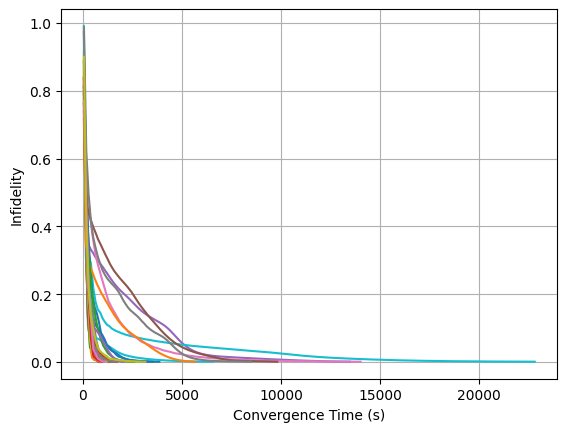

In [ ]:

for i in range(29):
  plt.plot(t_conv_2Q_4K[i], J_F_2Q_4K[i])
  #plot_conv(J_F_100_1K[i], t_conv_100_1K[i])
  plt.grid('on')
  plt.xlabel("Convergence Time (s)")
  plt.ylabel("Infidelity")
  #plt.title('Krotov')
  #plt.legend()
  plt.label=('Krotov')
#plt.savefig('ConvPlots5.png')
